# PASS NETWORKS

## Barcelona - Real Cociedad

### 2018

#### Barcelona

In [13]:
import pandas as pd
from mplsoccer.pitch import Pitch
import requests
from pandas import json_normalize
import matplotlib.pyplot as plt

In [14]:
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/9948.json')
events = events.json()

df=json_normalize(events, sep="_")

In [15]:
pd.set_option("display.max.columns",None)

df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,under_pressure,counterpress,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,dribble_overrun,goalkeeper_end_location,foul_committed_type_id,foul_committed_type_name,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,foul_committed_offensive,clearance_aerial_won,shot_first_time,pass_aerial_won,pass_backheel,foul_committed_card_id,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_miscommunication,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,shot_one_on_one,shot_aerial_won,foul_won_defensive
0,62b95a47-e3e7-47eb-a6a4-4ad7eac4009a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,217,Barcelona,1,Regular Play,217,Barcelona,433.0,"[{'player': {'id': 20055, 'name': 'Marc-André ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ea03246b-4264-4526-aea3-89b2fbd8faec,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,217,Barcelona,1,Regular Play,210,Real Sociedad,4231.0,"[{'player': {'id': 7069, 'name': 'Miguel Ángel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44a69b91-c642-40b1-a615-db11054b3adb,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[11493e75-0d53-4489-8ccf-a2d2752661ec],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11493e75-0d53-4489-8ccf-a2d2752661ec,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,217,Barcelona,1,Regular Play,210,Real Sociedad,NaN,NaN,[44a69b91-c642-40b1-a615-db11054b3adb],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,577a60d2-e469-4b7d-9b68-b0011da2f351,5,1,00:00:00.968,0,0,2,2.756,30,Pass,210,Real Sociedad,9,From Kick Off,210,Real Sociedad,NaN,NaN,[0f648804-fdf7-4d4f-b165-80b47eee9d

In [16]:
df = df[df['team_name']=='Barcelona']

In [17]:
passes = df[df['type_name']=='Pass']
successful = passes[passes['pass_outcome_name'] != 'Incomplete']
successful = successful[successful['pass_outcome_name'] != 'Out']
successful = successful[successful['pass_outcome_name'] != 'Unknown']
successful = successful[successful['pass_outcome_name'] != 'Pass Offs']
successful = successful[successful['pass_outcome_name'] != 'Injury Clearance']

In [18]:
subs = df[df['type_name']=='Substitution']
subs = subs['minute']
firstSub = subs.min()
successful = successful[successful['minute'] < firstSub]

In [19]:
pas = pd.to_numeric(successful['player_id'],downcast='integer')
rec = pd.to_numeric(successful['pass_recipient_id'],downcast='integer')
successful['player_id'] = pas
successful['pass_recipient_id'] = rec

In [20]:
location_xy = successful.location.apply(pd.Series)
location_xy.columns = ['x', 'y']
successful = successful.join(location_xy)

In [21]:
successful

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,under_pressure,counterpress,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,dribble_overrun,goalkeeper_end_location,foul_committed_type_id,foul_committed_type_name,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,foul_committed_offensive,clearance_aerial_won,shot_first_time,pass_aerial_won,pass_backheel,foul_committed_card_id,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_miscommunication,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,shot_one_on_one,shot_aerial_won,foul_won_defensive,x,y
11,382cfc0d-1d20-4d23-a4e3-3dca84da93ea,12,1,00:00:23.114,0,23,3,1.196,30,Pass,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,[01755831-6582-4ac7-b290-64a65993dae0],"[13.0, 1.0]",5211,Jordi Alba Ramos,6.0,Left Back,5246,Luis Alberto Suárez Díaz,14.142136,0.141897,2.0,Low Pass,"[27.0, 3.0]",NaN,NaN,67.0,Throw-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,1.0
19,448d9113-aa1f-4e24-ac47-9f8127129c41,20,1,00:00:26.747,0,26,3,0.720,30,Pass,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,[de38d3d9-7406-4400-af51-a36e8839ba96],"[29.0, 3.0]",5246,Luis Alberto Suárez Díaz,23.0,Center Forward,5216,Andrés Iniesta Luján,5.000000,2.214297,1.0,Ground Pass,"[26.0, 7.0]",38.0,Left Foot,66.0,Recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,3.0
23,cb559818-5fb2-41a8-a72a-b1d467b54df7,24,1,00:00:28.900,0,28,3,0.486,30,Pass,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[5df13aa4-6695-43cd-bab1-77435fc6f757, 8f51453...","[30.0, 5.0]",5216,Andrés Iniesta Luján,15.0,Left Center Midfield,5246,Luis Alberto Suárez Díaz,3.605551,0.982794,1.0,Ground Pass,"[32.0, 8.0]",40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0
30,6e122546-9761-4dcd-a5aa-03c505820dbc,31,1,00:00:38.859,0,38,4,0.849,30,Pass,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,[3c687292-c7a3-472a-9831-6e05d0e0add6],"[36.0, 1.0]",5211,Jordi Alba Ramos,6.0,Left Back,5216,Andrés Iniesta Luján,7.071068,1.428899,2.0,Low Pass,"[37.0, 8.0]",NaN,NaN,67.0,Throw-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [22]:
average_locations = successful.groupby('player_id').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [23]:
pass_between = successful.groupby(['player_id', 'pass_recipient_id']).id.count().reset_index()
pass_between.rename({'id':'pass_count'}, axis='columns', inplace=True)

pass_between = pass_between.merge(average_locations, left_on = 'player_id', right_index=True)
pass_between = pass_between.merge(average_locations, left_on = 'pass_recipient_id', right_index=True, suffixes = ['', '_end'])

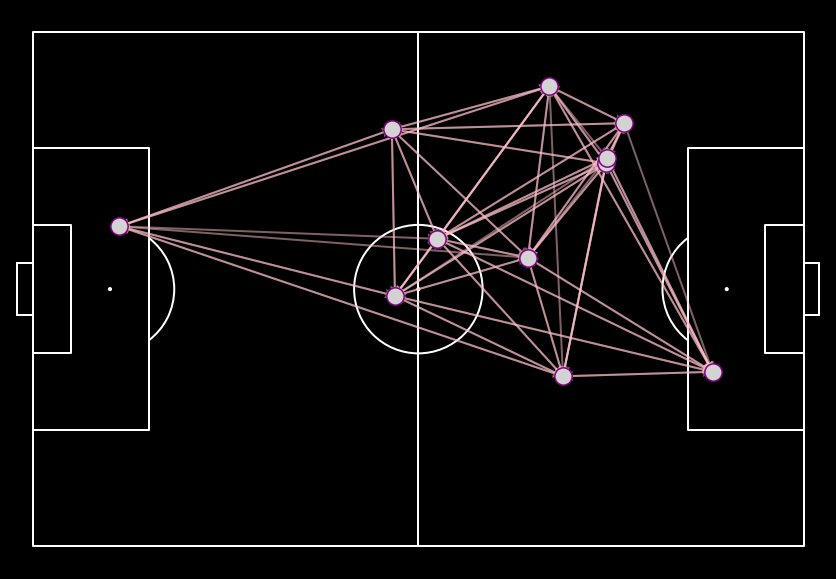

In [24]:
fig, ax=plt.subplots(figsize=(15.6,10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal', positional=False,positional_color='grey',
           pitch_color='black',line_color='white', goal_type='box',constrained_layout=True,tight_layout=False)

pitch.draw(ax=ax)

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 2, headwidth = 5, color = 'pink', ax = ax, zorder = 1, alpha = .5)


nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'purple', linewidth = 1.5, alpha = 1, zorder = 1, ax=ax)